In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# d 값의 행렬 만들기
def get_matrix(x1,x2,y,d):
    n = x1.size
    Xin1 = np.zeros((n,d+1))
    Xin2 = np.zeros((n,d+1))
    
    for i in range(d+1):
        Xin1[:,i] = x1**i
        Xin2[:,i] = x2**i
    Y=np.reshape(y,(-1,1))
    return Xin1,Xin2,Y
  

In [3]:
#Gain W
#transpose, 역행렬 계산->w, y_pred (loss_func MSE)
def gain_W(X,y):
    A=np.matmul(X.transpose(),X)#(d,n)*(n,d)=(d,d)
    B=np.matmul(np.transpose(X),y)#(d,n)*(n*1)=(d*1)
    W=np.linalg.solve(A,B)#(d,d)*(d*1)=(d*1)
    return W

def gain_y_pred(X,W):
    y=np.matmul(X,W)#(n,d)*(d*1)=(n*1)
    return y

In [4]:
#4-3. Gain MSE
def MSE(y_pred, yt):
    mse =np.square(np.subtract(y_pred.reshape(-1),yt.reshape(-1))).mean()
    return mse

# MSE_train=[]
# MSE_val=[]

No handles with labels found to put in legend.


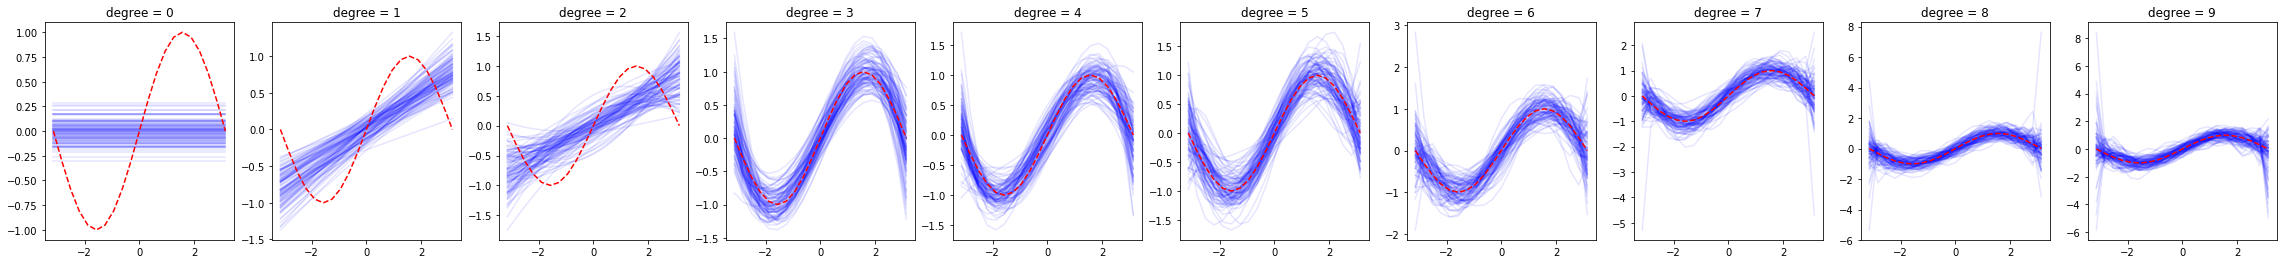

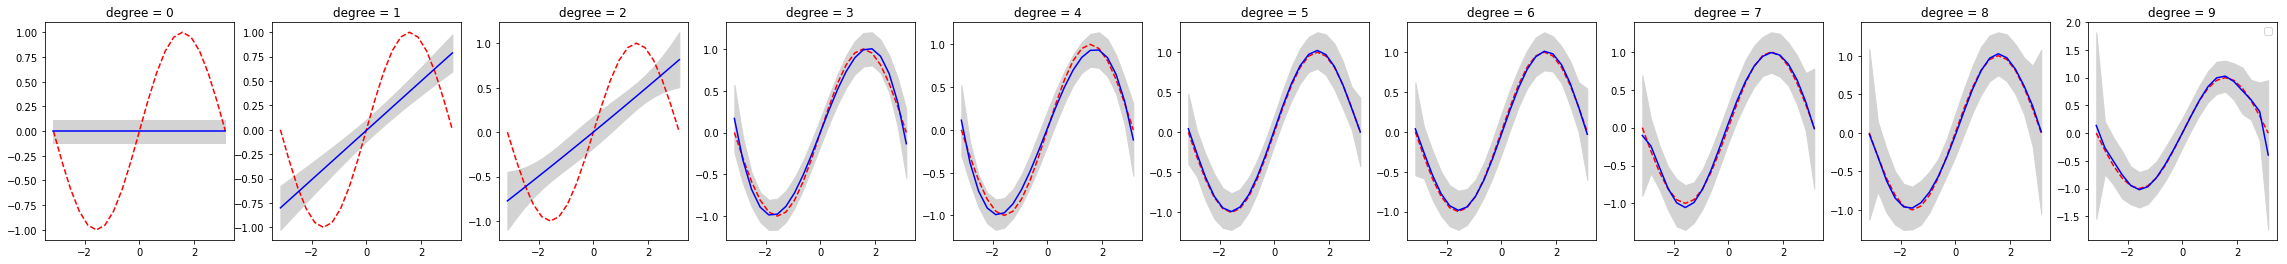

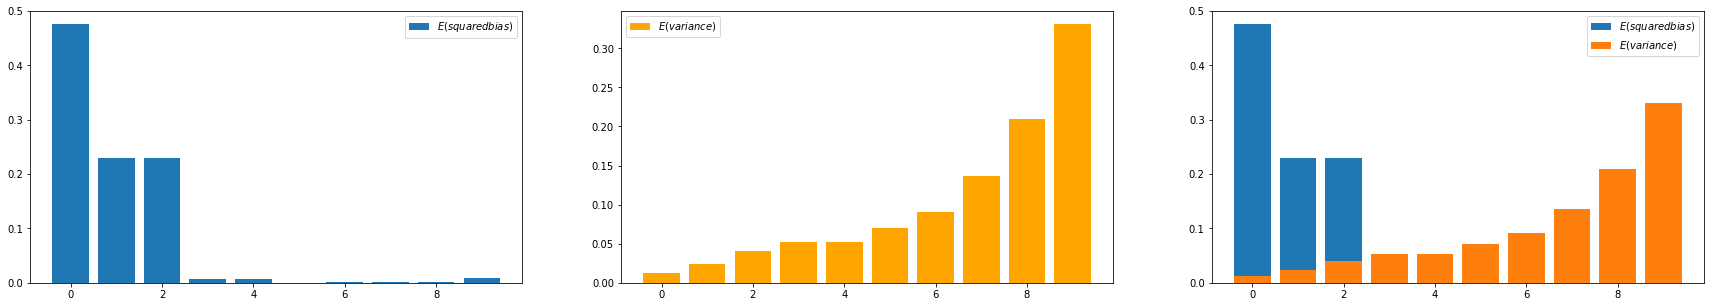

In [5]:
F,AXES = plt.subplots(nrows=1,ncols=10, figsize=(40,4))
f,axes = plt.subplots(nrows=1,ncols=10, figsize=(40,4))

n=21
num=100
yt_num=np.zeros((num,n))
var_mean=np.zeros((1,10))
bias_square=np.zeros((1,10))

#1. 0~10 iterations
for d in range(0,10):
    
    #2-3. 100 iterations
    for i in range(0,num):
        ###2-1. training data xt도 noise 적용
        xt_wn=np.linspace(-np.pi,np.pi,n) + np.random.normal(0,np.pi/n,(n))
        yt=np.sin(xt_wn)+np.random.normal(0,0.5,(n))
        ###training data xt without noise
        xt=np.linspace(-np.pi,np.pi,n)
        
        X1,X2,y1=get_matrix(xt_wn,xt,yt,d)#training: d 에 맞춰 행렬 만들기
        
        w=gain_W(X1,y1)###2-2. noise 가 섞인 xt_wn로 w값을 구하고
        yt_pred=gain_y_pred(X2,w)### y predict 값은 noise가 없는 xt으로 구한다
        yt_num[i,:]=yt_pred.reshape(1,-1)#50개의 y_pred 값 축적
        
        #graph for each 50 iterations
        AXES[d].plot(xt,yt_pred,'b-', alpha=0.1) #2-6. draw prediction graph for all 100 iterations(yellow)
    AXES[d].plot(xt,np.sin(xt),'r--') # 빨간색 true 
    AXES[d].set_title('degree = '+str(d))
    
    #2-4. compute standard deviation and mean for each xt(50개)
    std_num = np.std(yt_num,axis=0)#각 yt(100개)의 표준편차
    yt_num_mean = yt_num.mean(axis=0)#각 yt(100개)의 평균
    
    axes[d].plot(xt,np.sin(xt),'r--') # 빨간색: true 
    axes[d].plot(xt,yt_num_mean,'b-') #파란색: 100개 평균
    axes[d].fill_between(xt,yt_num_mean + std_num,yt_num_mean - std_num,color='lightgrey')#2-7. fillbetween
    axes[d].set_title('degree = '+str(d))

    #2-5. compute squared bias and variance for each d(10) by obtaining average of 21 xt positions
    var_mean[0,d] = np.var(yt_num,axis=0).mean()#각 d의 분산
    bias_square[0,d] = np.mean(np.square(yt_num_mean-np.sin(xt))).astype(float)#각 d의 (100개 평균 - true)제곱합
plt.legend()
plt.show()


#3. plot squared bias, variance
f,axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
axes[0].bar(np.arange(0,10), bias_square.reshape(10),align='center',label = '$E(squared bias)$') # bar for square bias
axes[0].legend()
axes[1].bar(np.arange(0,10), var_mean.reshape(10),color='orange',align='center',label = '$E(variance)$')# bar for variance
axes[1].legend()
axes[2].bar(np.arange(0,10), bias_square.reshape(10), label = '$E(squared bias)$')
axes[2].bar(np.arange(0,10), var_mean.reshape(10),label = '$E(variance)$')
axes[2].legend()

# ax1.plot(xtr, color='r', label='HHZ 1')
# ax1.legend(loc="upper right")
# ax2.plot(xtr, color='r', label='HHN')
# ax2.legend(loc="upper right")
# ax3.plot(xtr, color='r', label='HHE')
# ax3.legend(loc="upper right")

plt.legend()
plt.show()
